### COURSERA | IBM DATA SCIENCE | COMPLEX PLOTS
The purpose of this program is to explore complex plots such as pie charts, box plots, scatter plots, and bubble plots through the MatPlotLib library. <br>
Data regarding Canadian immigration from 1980 to 2013 was used to develop each model. <br>
The program uses Canadian immigration data from the [U.N. website](https://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.asp)

In [1]:
import numpy as np
import pandas as pd

#### PART 1: DOWNLOAD & CLEAN IMMIGRATION DATA

In [2]:
!conda install -c anaconda xlrd --yes

Solving environment: done

# All requested packages already installed.



In [3]:
df = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                    sheet_name='Canada by Citizenship', skiprows=range(20), skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df.columns = list(map(str, df.columns))
df.set_index('Country', inplace=True)
df['Total'] = df.sum(axis=1)
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [5]:
print("Data Dimensions: ", df.shape)

Data Dimensions:  (195, 38)


#### PART 2: VISUALIZING DATA IN PIE CHART

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.style.use('ggplot')

In [7]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

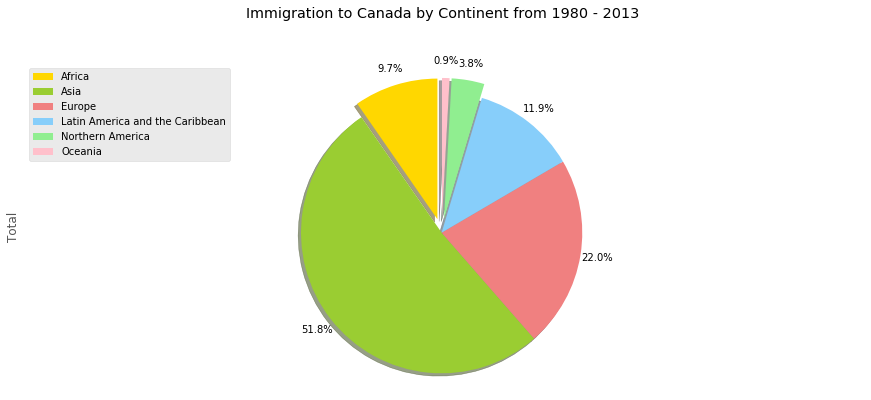

In [8]:
df_cont = df.groupby('Continent', axis=0).sum()
df_cont['Total'].plot(kind='pie', figsize=(15, 6), autopct='%1.1f%%', startangle=90, shadow=True, labels=None, pctdistance=1.12,    
                            colors=colors_list, explode=explode_list)

plt.title('Immigration to Canada by Continent from 1980 - 2013', y=1.12)
plt.axis('equal')
plt.legend(labels=df_cont.index, loc='upper left')
plt.show()

#### PART 3: VISUALIZING DATA IN BOX PLOT

In [9]:
years = list(map(str, range(1980, 2014)))
df_japan = df.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


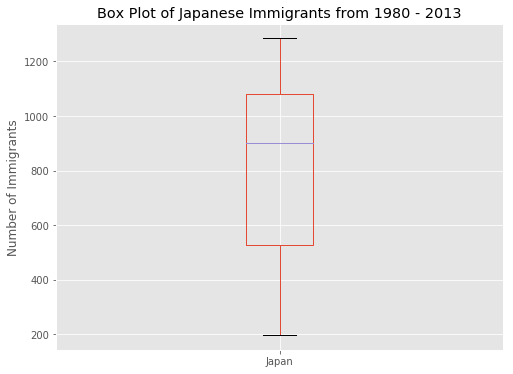

In [10]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box Plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()

In [11]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [12]:
df_ci = df.loc[['China', 'India'], years].transpose()
df_ci.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


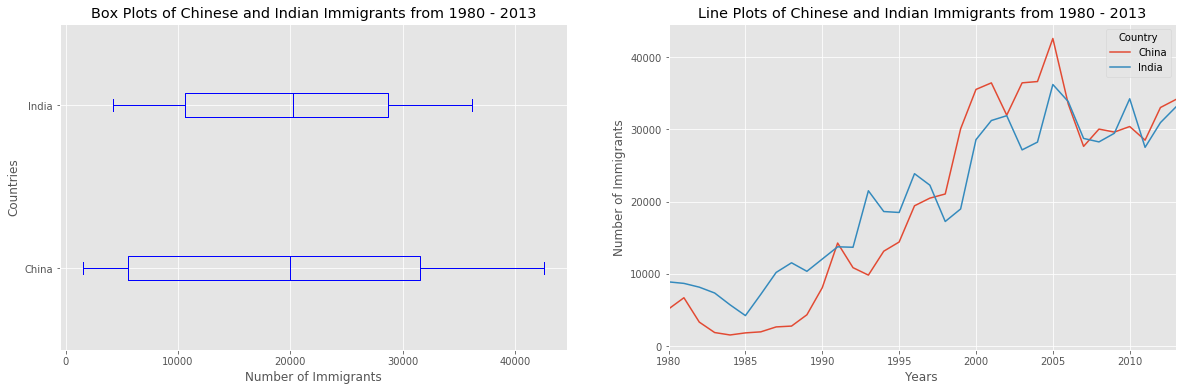

In [13]:
fig = plt.figure()

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)

df_ci.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0)
ax0.set_title('Box Plots of Chinese and Indian Immigrants from 1980 - 2013')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

df_ci.plot(kind='line', figsize=(20, 6), ax=ax1)
ax1.set_title('Line Plots of Chinese and Indian Immigrants from 1980 - 2013')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')
plt.show()

#### PART 4: VISUALIZING DATA IN SCATTER PLOT

In [14]:
df_tot = pd.DataFrame(df[years].sum(axis=0))
df_tot.index = map(int, df_tot.index)
df_tot.reset_index(inplace=True)
df_tot.columns = ['year', 'total']
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


In [15]:
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

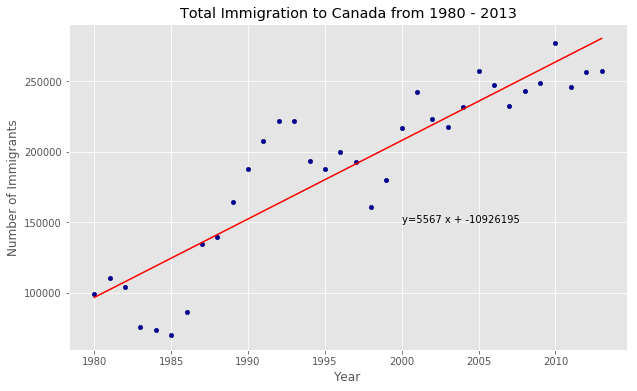

In [16]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')
plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.plot(x, fit[0] * x + fit[1], color='red')
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))
plt.show()

#### PART 5: VISUALIZING DATA IN BUBBLE PLOT

In [17]:
df_t = df[years].transpose()
df_t.index = map(int, df_t.index)
df_t.index.name = 'Year'
df_t.reset_index(inplace=True)
df_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [18]:
norm_brazil = (df_t['Brazil'] - df_t['Brazil'].min()) / (df_t['Brazil'].max() - df_t['Brazil'].min())
norm_argentina = (df_t['Argentina'] - df_t['Argentina'].min()) / (df_t['Argentina'].max() - df_t['Argentina'].min())

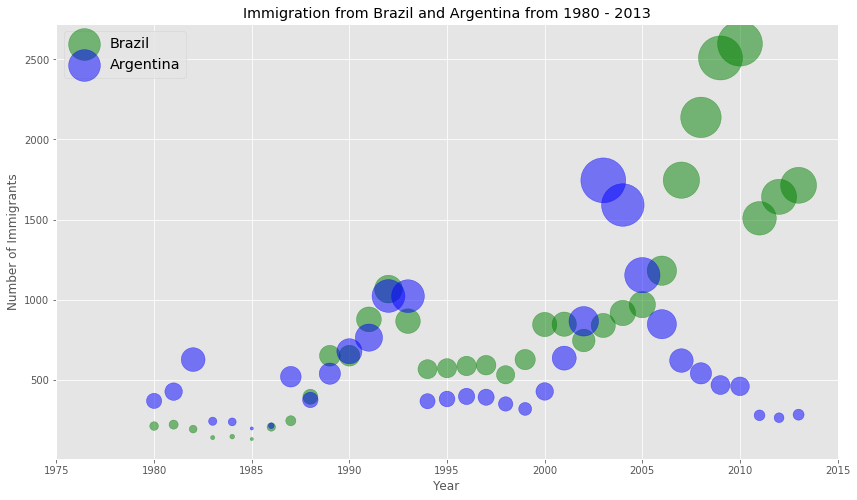

In [19]:
ax0 = df_t.plot(kind='scatter', x='Year', y='Brazil', figsize=(14, 8), alpha=0.5, color='green', s=norm_brazil * 2000 + 10, 
                    xlim=(1975, 2015))
ax1 = df_t.plot(kind='scatter', x='Year', y='Argentina', alpha=0.5, color="blue", s=norm_argentina * 2000 + 10, ax = ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')